<a href="https://colab.research.google.com/github/PKpacheco/assignmen_6_uml-t-sne/blob/main/Assignment_6_t_SNE_UML_Paola_Pacheco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6 - Unsupervised Machine Learning

Paola Katherine Pacheco - 0374446


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial import distance


## 1.Data


### a)Each row of csvImages 10k x 784.csv contains the gray scale values of a 28 x 28 image. Load this data into a pandas dataframe. Convert the dataframe to a numpy array using pandas.values. Print the shape of the data.


In [ ]:
# import files
url_file ='https://raw.githubusercontent.com/PKpacheco/assignmen_6_uml-t-sne/main/csvImages%2010k%20x%20784.csv'

In [ ]:
# Load csv
df = pd.read_csv(url_file).values

In [ ]:
# Print the shapes
print("Shape of df:", df.shape)

Shape of df: (9999, 784)


These shapes indicate that:
* (9999, 784) - 9,999 images and 784 columns


###b)Normalize by dividing each value by 255. In order to display the images, reshape the array so each image is 28 x 28 using numpy.ndarray.reshape. Use matplotlib.plot.imshow and matplotlib.plot.subplot to give a plot of the first five images using the 'gray' colour map. In order to put the data back in the original shape for input to the neural network, reshape each image to be 784 (one-dimensional).


In [ ]:
# Normalize
X_train_normalized = df / 255.0

In [ ]:
# Reshape each image to be 28 x 28
X_train_reshaped = X_train_normalized.reshape(-1, 28, 28)

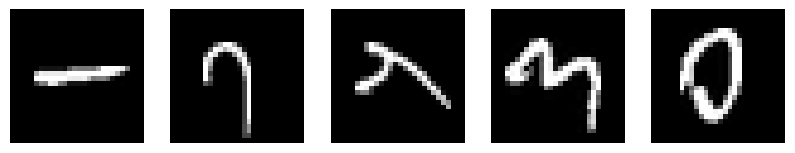

In [ ]:
# Plot
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train_reshaped[i], cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
X_train_normalized

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Reshape to be 784 one dimensional
X_train_flattened = X_train_normalized.reshape(-1, 784)

In [ ]:
# double check shape
X_train_flattened.shape

(9999, 784)

## 2.Clustering


### a)Use sklearn.decomposition.PCA.fit_transform to do a PCA transformation with n_components = 40. This reduces the dimension of each image to a size that is more manageable, while keeping the most important aspects of the data.


In [ ]:
#number of components PCA
n_components = 40

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_flattened)

print("Shape of X_train after PCA transformation:", X_train_pca.shape)


Shape of X_train after PCA transformation: (9999, 40)


### b)Create at least 8 different clustering models using k-means, (agglomerative and divisive) hierarchical, and DBSCAN clustering; experiment with different choices of hyperparameters. Calculate the silhouette score for each model and tabulate the results.


In [ ]:
# try to use elbow method to find the cluster number

clusters = 20
square_distance = []
for i in range(1,clusters):
    KM_model = KMeans(i, init='k-means++', n_init=15, max_iter=400)
    KM_model.fit(X_train_pca)
    square_distance.append(KM_model.inertia_)

square_distance

[354551.40432966,
 309468.5753311473,
 285164.54785584024,
 266388.735782661,
 248706.03169827868,
 237166.07592781383,
 228684.06996863958,
 221412.85985910927,
 214626.1480570866,
 208782.56952828285,
 203081.6735380251,
 198152.56065137385,
 193617.31052045716,
 189974.15412902425,
 186479.22125913342,
 182851.46408739287,
 180097.96072919585,
 176991.58129149082,
 174364.80150238532]

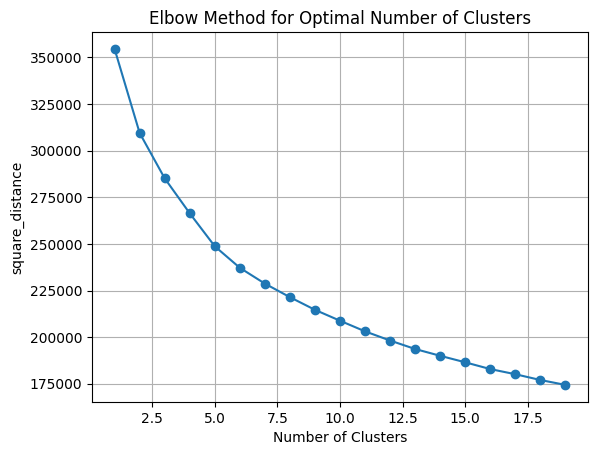

In [ ]:
cluster_numbers = list(range(1, clusters))

# Plot the inertia values
plt.plot(cluster_numbers, square_distance, marker='o', linestyle='-')
plt.xlabel("Number of Clusters")
plt.ylabel("square_distance")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.grid(True)
plt.show()

Based on the elbow method, we notice that the number of clusters is approximately 3

In [ ]:
X = X_train_pca

In [ ]:
#KMEANS

n_clusters = [2, 3, 4]

kmeans_df = pd.DataFrame(columns=['Number_of_Clusters', 'Silhouette_Score'])

for n_clusters_value in n_clusters:
    kmeans_model = KMeans(n_clusters=n_clusters_value, random_state=42)
    kmeans_labels = kmeans_model.fit_predict(X_train_pca)

    silhouette_avg = silhouette_score(X_train_pca, kmeans_labels)

    kmeans_df = kmeans_df.append({
        'Number_of_Clusters': n_clusters_value,
        'Silhouette_Score': silhouette_avg
    }, ignore_index=True)

print(kmeans_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-15-479ad7e60f3a>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kmeans_df = kmeans_df.append({
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-15-479ad7e60f3a>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kmeans_df = kmeans_df.append({
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change f

   Number_of_Clusters  Silhouette_Score
0                 2.0          0.298548
1                 3.0          0.133819
2                 4.0          0.092913


<ipython-input-15-479ad7e60f3a>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kmeans_df = kmeans_df.append({


In [ ]:
# Agglomerative

# Create all the hyperparameter options

# set some options for number of clusters
n_clusters_values = [3, 5 ,8, 10 ]

# set the 2 distance metrics
metrics = ['euclidean', 'manhattan']

# set all the linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

# Create a new DataFrame to store the results
results_agg = pd.DataFrame(columns=['n_clusters', 'metric', 'linkage', 'Silhouette Score'])

# Loop through different hyperparameters and calculate silhouette scores
model_num = 0

for n_clusters in n_clusters_values:
    for metric in metrics:
        for linkage in linkage_methods:
            if (linkage == 'ward' and metric != 'euclidean'):
                continue

            # Create and fit the Agglomerative Clustering model
            model = AgglomerativeClustering(n_clusters=n_clusters, affinity=metric, linkage=linkage)
            cluster_labels = model.fit_predict(X)

            # Calculate the silhouette score
            silhouette_avg = silhouette_score(X, cluster_labels)

            # Store the results_agg in the DataFrame
            results_agg.loc[model_num] = [n_clusters, metric, linkage, silhouette_avg]
            model_num += 1

print(results_agg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

    n_clusters     metric   linkage  Silhouette Score
0            3  euclidean      ward          0.756911
1            3  euclidean  complete          0.756911
2            3  euclidean   average          0.756911
3            3  euclidean    single          0.756911
4            3  manhattan  complete          0.756911
5            3  manhattan   average          0.756911
6            3  manhattan    single          0.756911
7            5  euclidean      ward          0.686945
8            5  euclidean  complete          0.654505
9            5  euclidean   average          0.701811
10           5  euclidean    single          0.701283
11           5  manhattan  complete          0.656145
12           5  manhattan   average          0.708428
13           5  manhattan    single          0.609500
14           8  euclidean      ward          0.319739
15           8  euclidean  complete          0.379183
16           8  euclidean   average          0.443160
17           8  euclidean   

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
#divisive

# Create all the hyperparameter choices
threshold_values = [3.0, 5.0]
linkage_criteria = ['ward', 'single', 'complete', 'average']
depth_values = [2, 3, 10]

# Create a new DataFrame to store the results
results_fcluster = pd.DataFrame(columns=['Threshold (t)', 'Linkage Criterion', 'Depth', 'Silhouette Score'])

max_models = 10
model_num = 0

for t in threshold_values:
    for criterion in linkage_criteria:
        for depth in depth_values:
            # Create the hierarchical clustering linkage matrix
            Z_hierarchy = linkage(X, method=criterion)

            # Perform divisive clustering using fcluster
            cluster_labels_fcluster = fcluster(Z_hierarchy, t, criterion='distance', depth=depth)

            # Check if there are at least two clusters
            unique_labels = np.unique(cluster_labels_fcluster)
            if len(unique_labels) >= 2:
                # Calculate the silhouette score
                silhouette_avg = silhouette_score(X, cluster_labels_fcluster)

                # Store the results in the DataFrame
                results_fcluster.loc[model_num] = [t, criterion, depth, silhouette_avg]
                model_num += 1

                if model_num >= max_models:
                    break
        if model_num >= max_models:
            break
    if model_num >= max_models:
        break

print(results_fcluster)


   Threshold (t) Linkage Criterion  Depth  Silhouette Score
0            3.0              ward      2          0.358785
1            3.0              ward      3          0.358785
2            3.0              ward     10          0.358785
3            3.0            single      2          0.756911
4            3.0            single      3          0.756911
5            3.0            single     10          0.756911
6            3.0          complete      2          0.353849
7            3.0          complete      3          0.353849
8            3.0          complete     10          0.353849
9            3.0           average      2          0.564456


In [ ]:
#DBSCAN

# Create a list of all the hyperparameters
epsilon_values = [ 0.1, 1.0 , 5.0]
min_samples_values = [3, 5, 10]
metrics = ['euclidean', 'manhattan']
p_values = [1, 2]

results_df = pd.DataFrame(columns=['Epsilon', 'Min_Samples', 'Metric', 'P', 'Silhouette Score'])

max_models = 30

model_count = 0

for eps in epsilon_values:
    for min_samples in min_samples_values:
        for metric in metrics:
            for p in p_values:
              if model_count >= max_models:
                break

              dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric, p=p)
              dbscan_labels = dbscan.fit_predict(X_train_pca)
              # silhouette score
              if len(set(dbscan_labels)) > 1:
                  silhouette_avg = silhouette_score(X_train_pca, dbscan_labels)
              else:
                  silhouette_avg = -1

              # append results to a df
              results_df = results_df.append({
                  'Epsilon': eps,
                  'Min_Samples': min_samples,
                  'Metric': metric,
                  'P': p,
                  'Silhouette Score': silhouette_avg
              }, ignore_index=True)
              model_count += 1
# Display the results_fcluster in a tabular format
print(results_df)

<ipython-input-20-a07ccc19624b>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-20-a07ccc19624b>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-20-a07ccc19624b>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-20-a07ccc19624b>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-20-a07ccc19624b>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = 

    Epsilon Min_Samples     Metric  P  Silhouette Score
0       0.1           3  euclidean  1         -0.156282
1       0.1           3  euclidean  2         -0.156282
2       0.1           3  manhattan  1         -1.000000
3       0.1           3  manhattan  2         -1.000000
4       0.1           5  euclidean  1         -1.000000
5       0.1           5  euclidean  2         -1.000000
6       0.1           5  manhattan  1         -1.000000
7       0.1           5  manhattan  2         -1.000000
8       0.1          10  euclidean  1         -1.000000
9       0.1          10  euclidean  2         -1.000000
10      0.1          10  manhattan  1         -1.000000
11      0.1          10  manhattan  2         -1.000000
12      1.0           3  euclidean  1         -0.242570
13      1.0           3  euclidean  2         -0.242570
14      1.0           3  manhattan  1         -0.156550
15      1.0           3  manhattan  2         -0.156550
16      1.0           5  euclidean  1         -0

<ipython-input-20-a07ccc19624b>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [ ]:
#kmeans_df
best_kmeans_n_clusters = kmeans_df.loc[kmeans_df['Silhouette_Score'].idxmax()]
highest_silhouette_score_kmeans = best_kmeans_n_clusters['Silhouette_Score']
best_n_clusters_kmeans = best_kmeans_n_clusters['Number_of_Clusters']


# highest silhouette score agg
max_silhouette_row = results_agg.loc[results_agg['Silhouette Score'].idxmax()]
highest_silhouette_score = max_silhouette_row['Silhouette Score']
best_n_clusters = max_silhouette_row['n_clusters']
best_metric = max_silhouette_row['metric']
best_linkage = max_silhouette_row['linkage']

#highest silhouette score fcluster
max_silhouette_row_fcluster = results_fcluster.loc[results_fcluster['Silhouette Score'].idxmax()]
highest_silhouette_score_fcluster = max_silhouette_row_fcluster['Silhouette Score']
best_threshold = max_silhouette_row_fcluster['Threshold (t)']
best_linkage_fcluster = max_silhouette_row_fcluster['Linkage Criterion']
best_depth_fcluster = max_silhouette_row_fcluster['Depth']


#  highest silhouette score dbscan
max_silhouette_row_df = results_df.loc[results_df['Silhouette Score'].idxmax()]
highest_silhouette_score_df = max_silhouette_row_df['Silhouette Score']
best_epsilon = max_silhouette_row_df['Epsilon']
best_min_samples = max_silhouette_row_df['Min_Samples']
best_metric_df = max_silhouette_row_df['Metric']
best_p = max_silhouette_row_df['P']



In [ ]:
#kmeans_df

print('KMEANS')
print(f"Highest Silhouette Score : {highest_silhouette_score_kmeans}")
print(f"Best Number of Clusters: {best_n_clusters_kmeans}")
print()

print('AGGLOMERATIVE')
print(f"Highest Silhouette Score : {highest_silhouette_score}")
print(f"Best Number of Clusters: {best_n_clusters}")
print(f"Best Metric: {best_metric}")
print(f"Best Linkage: {best_linkage}")
print()

print('FSCORE')
print(f"Highest Silhouette Score : {highest_silhouette_score_fcluster}")
print(f"Best Threshold: {best_threshold}")
print(f"Best Linkage Criterion: {best_linkage_fcluster}")
print(f"Best Depth: {best_depth_fcluster}")
print()

print('DBSCAN')
print(f"Highest Silhouette Score : {highest_silhouette_score_df}")
print(f"Best Epsilon: {best_epsilon}")
print(f"Best Min Samples: {best_min_samples}")
print(f"Best Metric: {best_metric_df}")
print(f"Best P: {best_p}")

KMEANS
Highest Silhouette Score : 0.29854816489127534
Best Number of Clusters: 2.0

AGGLOMERATIVE
Highest Silhouette Score : 0.7569108532473462
Best Number of Clusters: 3
Best Metric: euclidean
Best Linkage: ward

FSCORE
Highest Silhouette Score : 0.7569108532473462
Best Threshold: 3.0
Best Linkage Criterion: single
Best Depth: 2

DBSCAN
Highest Silhouette Score : 0.2165224582008196
Best Epsilon: 5.0
Best Min Samples: 5
Best Metric: euclidean
Best P: 1


### c)Select the best model for the use case and justify your choice in markdown.


The highest silhouette score is 0.75, with hyperparameters:

* model: **AGGLOMERATIVE** ( and divisive have same silhouette score)
* Highest Silhouette Score : 0.7569108532473462
* Best Number of Clusters: 2
* Best Metric: euclidean
* Best Linkage: complete


The best model was because the highest silhouette score

## 3- t_SNE


###a)Use sklearn.manifold.TSNE to perform a dimensional reduction on the dataset using t-SNE with n_components = 2. Try at least 8 different ways of doing this by using different choices for perplexity, n_iter, and metric.


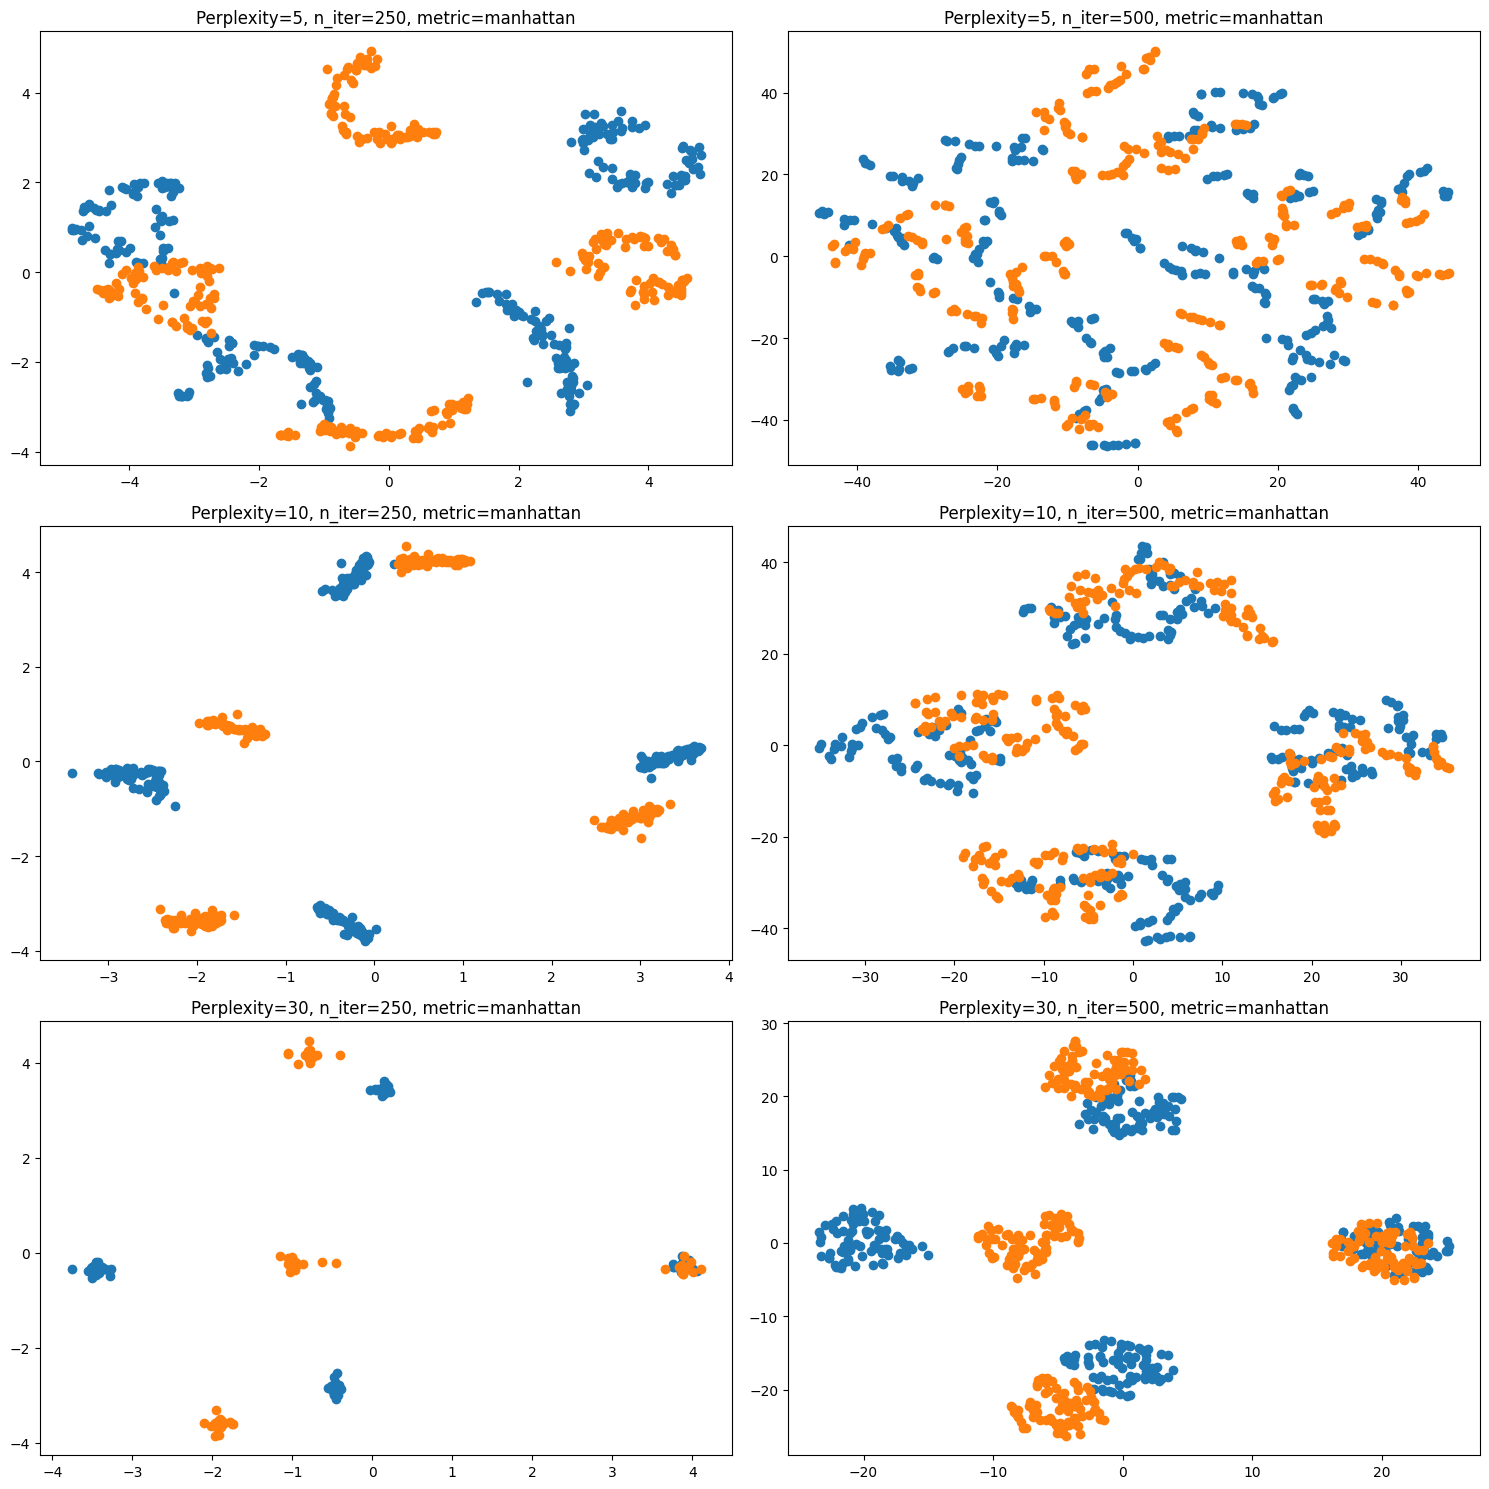

In [ ]:
# huperparameters t-SNE
perplexity_values = [5, 10,30]
n_iter_values = [250, 500]
metrics = ['euclidean', 'manhattan']

fig, axes = plt.subplots(len(perplexity_values), len(n_iter_values), figsize=(15, 15))

axes = axes.flatten()

for i, perplexity in enumerate(perplexity_values):
    for j, n_iter in enumerate(n_iter_values):
        for metric in metrics:
            # Create t-SNE model
            tsne_model = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, metric=metric)

            # Transform the data using t-SNE
            X_tsne = tsne_model.fit_transform(X)

            # Plot the t-SNE components
            axes[i * len(n_iter_values) + j].scatter(X_tsne[:, 0], X_tsne[:, 1], label=f'Perplexity={perplexity}, n_iter={n_iter}, metric={metric}')
            axes[i * len(n_iter_values) + j].set_title(f'Perplexity={perplexity}, n_iter={n_iter}, metric={metric}')

plt.tight_layout()
plt.show()


In [ ]:
# hyperparameters for t-SNE
perplexity_values = [5, 10, 30]
n_iter_values = [250, 500]
metrics = ['euclidean']

# store t-SNE models

tsne_results = pd.DataFrame(columns=['Perplexity', 'n_iter', 'Metric'])

for perplexity in perplexity_values:
    for n_iter in n_iter_values:
        for metric in metrics:
            tsne_model = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, metric=metric)

            X_tsne = tsne_model.fit_transform(X)

            tsne_results = tsne_results.append({'Perplexity': perplexity, 'n_iter': n_iter, 'Metric': metric}, ignore_index=True)

print(tsne_results)


<ipython-input-96-1d39f66b2d87>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tsne_results = tsne_results.append({'Perplexity': perplexity, 'n_iter': n_iter, 'Metric': metric}, ignore_index=True)
<ipython-input-96-1d39f66b2d87>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tsne_results = tsne_results.append({'Perplexity': perplexity, 'n_iter': n_iter, 'Metric': metric}, ignore_index=True)
<ipython-input-96-1d39f66b2d87>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tsne_results = tsne_results.append({'Perplexity': perplexity, 'n_iter': n_iter, 'Metric': metric}, ignore_index=True)
<ipython-input-96-1d39f66b2d87>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

  Perplexity n_iter     Metric
0          5    250  euclidean
1          5    500  euclidean
2         10    250  euclidean
3         10    500  euclidean
4         30    250  euclidean
5         30    500  euclidean


<ipython-input-96-1d39f66b2d87>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tsne_results = tsne_results.append({'Perplexity': perplexity, 'n_iter': n_iter, 'Metric': metric}, ignore_index=True)


###b)Provide a scatter plot using the t-SNE components as coordinates and colour the points according to cluster membership. Print the Roman digit corresponding to each cluster at its centroid.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


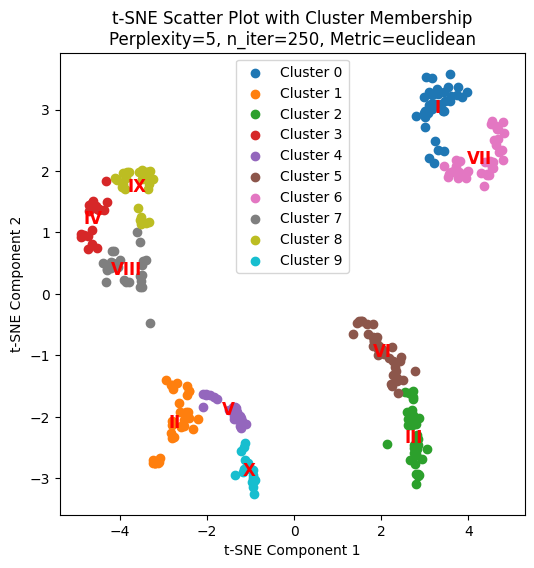

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


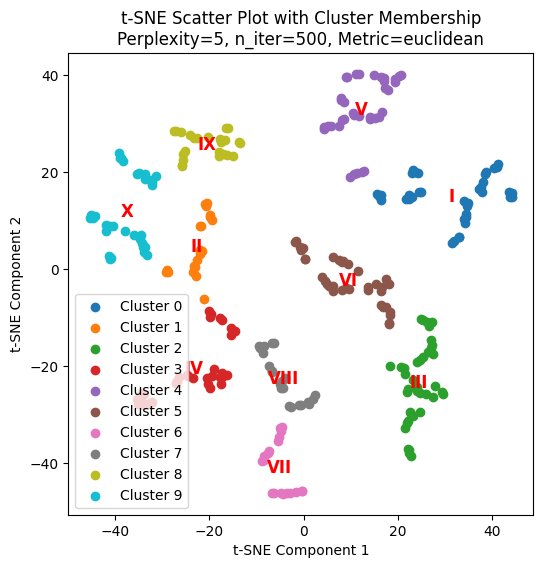

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


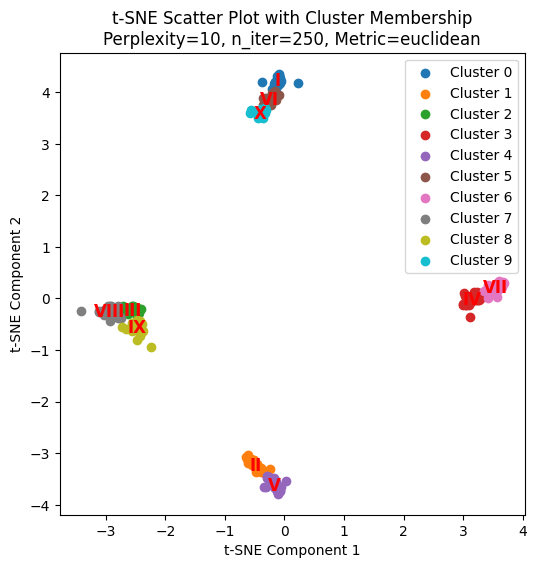

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


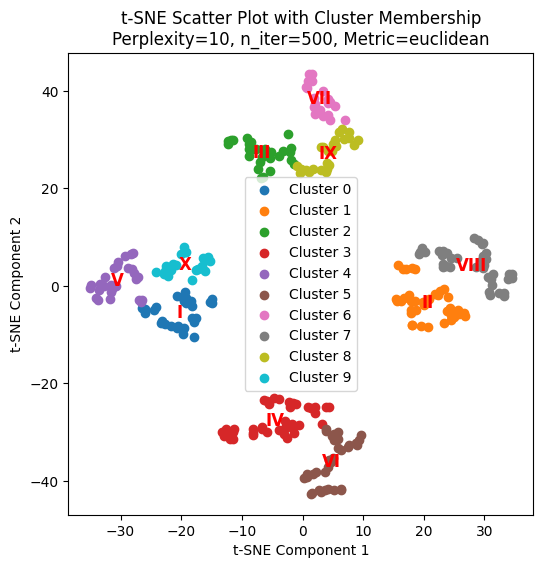

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


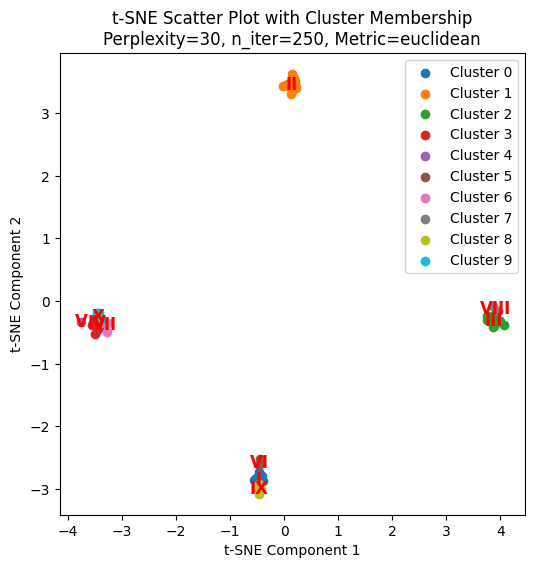

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


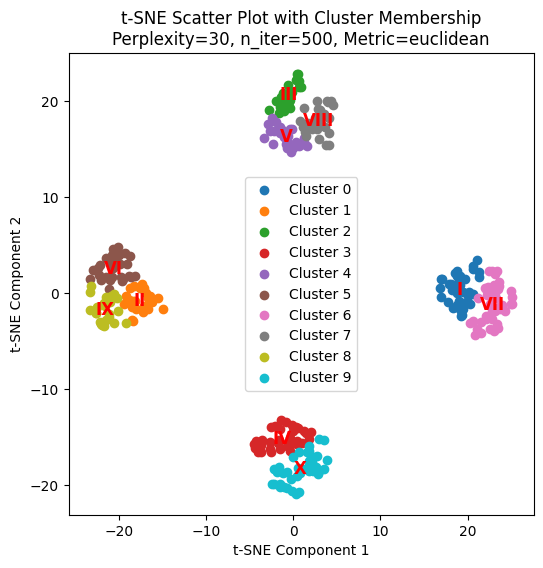

In [ ]:
# clusters 10
for idx, row in tsne_results.iterrows():
    perplexity = int(row['Perplexity'])
    n_iter = int(row['n_iter'])
    metric = row['Metric']

    tsne_model = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, metric=metric)

    # Fit and transform the data using t-SNE
    X_tsne = tsne_model.fit_transform(X)

    num_clusters = 10
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans_model.fit_predict(X_tsne)

    # scatter plot with different colors for each cluster
    plt.figure(figsize=(6,6))
    for i in range(num_clusters):
        cluster_points = X_tsne[cluster_labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

    #centroid roman digits
    centroids = np.array([np.mean(X_tsne[cluster_labels == i], axis=0) for i in range(num_clusters)])
    roman_digits = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X']

    for i, (x, y) in enumerate(centroids):
        plt.text(x, y, roman_digits[i], fontsize=12, fontweight='bold', ha='center', va='center', color='red')

    plt.title(f't-SNE Scatter Plot with Cluster Membership\nPerplexity={perplexity}, n_iter={n_iter}, Metric={metric}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend()
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


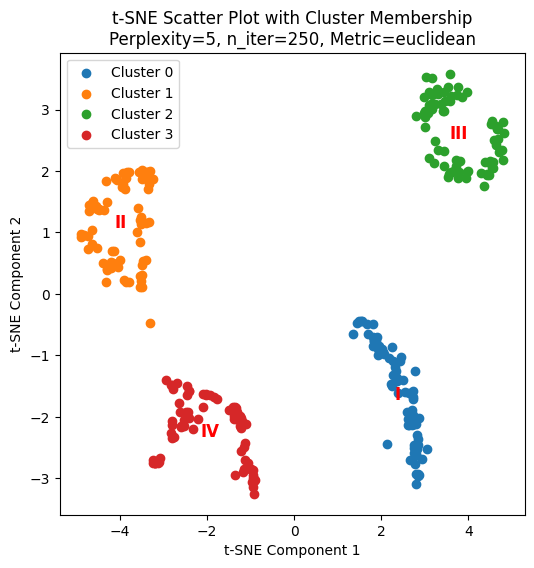

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


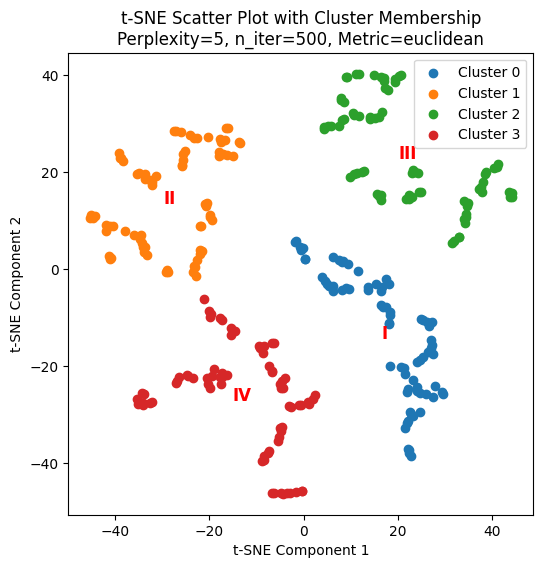

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


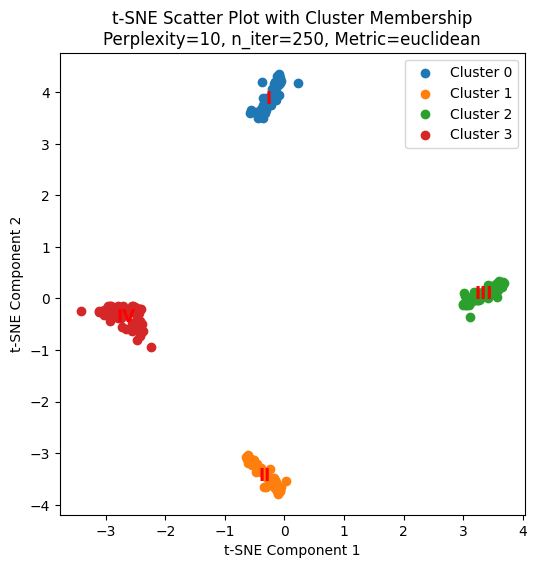

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


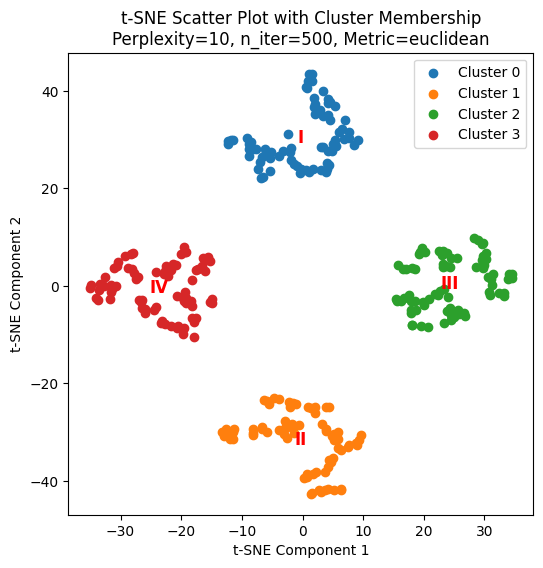

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


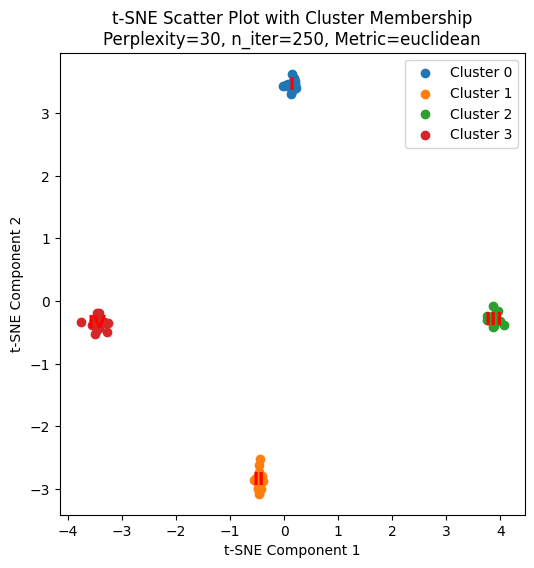

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


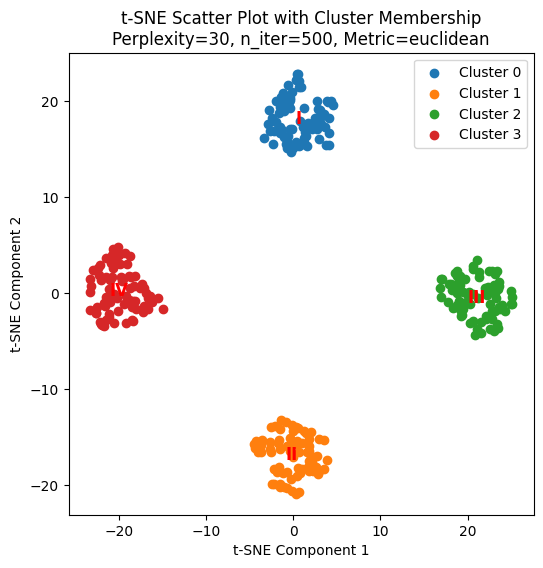

In [ ]:
# clusters=-4
for idx, row in tsne_results.iterrows():
    perplexity = int(row['Perplexity'])
    n_iter = int(row['n_iter'])
    metric = row['Metric']

    tsne_model = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, metric=metric)

    # Fit and transform the data using t-SNE
    X_tsne = tsne_model.fit_transform(X)

    num_clusters = 4
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans_model.fit_predict(X_tsne)

    # scatter plot with different colors for each cluster
    plt.figure(figsize=(6,6))
    for i in range(num_clusters):
        cluster_points = X_tsne[cluster_labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

    #centroid roman digits
    centroids = np.array([np.mean(X_tsne[cluster_labels == i], axis=0) for i in range(num_clusters)])
    roman_digits = ['I', 'II', 'III', 'IV']

    for i, (x, y) in enumerate(centroids):
        plt.text(x, y, roman_digits[i], fontsize=12, fontweight='bold', ha='center', va='center', color='red')

    plt.title(f't-SNE Scatter Plot with Cluster Membership\nPerplexity={perplexity}, n_iter={n_iter}, Metric={metric}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend()
    plt.show()


###c)Using markdown, explain which plot provides the best visualization. You may wish to revisit the clustering models in step 2 to improve your results.



The best visualization is:
- Perplexity = 30
- n_iter = 500

We can see the clusters cleary, the centroids are positioned in the middle of clusters and consistence in the clusters sizes.


## 4- Conclusion

###a)Display again your best t-SNE plot of your best model and restate the hyperparameter choices.


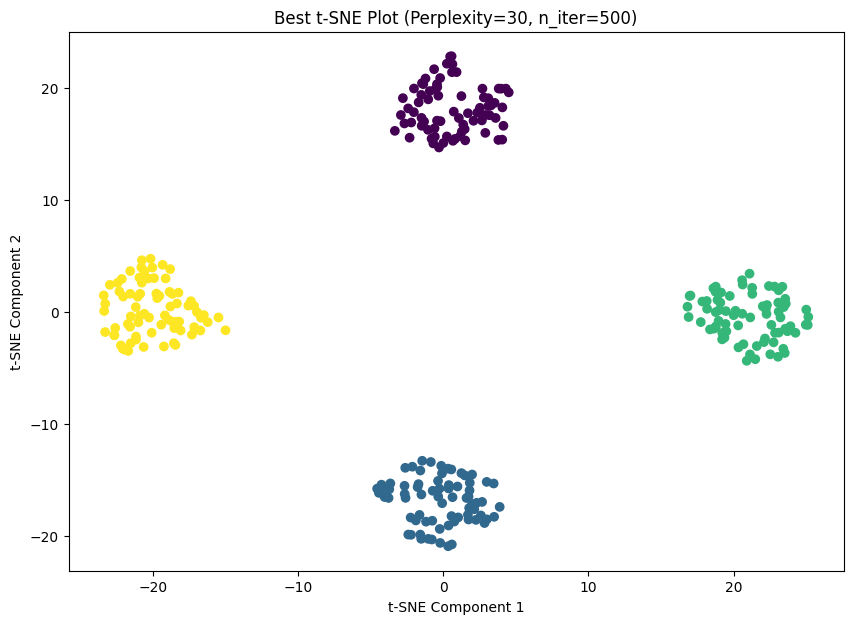

In [ ]:
# besf tnse hyperparameters
best_perplexity = 30
best_n_iter = 500
best_metric = 'euclidean'

best_tsne_model = TSNE(n_components=2, perplexity=best_perplexity, n_iter=best_n_iter, metric=best_metric)

X_best_tsne = best_tsne_model.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_best_tsne[:, 0], X_best_tsne[:, 1], c=cluster_labels, cmap='viridis')
plt.title(f'Best t-SNE Plot (Perplexity={best_perplexity}, n_iter={best_n_iter})')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


###b) Use markdown to discuss how well suited this data is for classification. Identify any classes which may be confused by a classification model.


The model is not good enough for the type of classification requested in the problem.
We need to identify numbers, so we have 10 numbers.
When we try the classification with 10 clusters we see that in our best visualization the model plots the clusters of some numbers very close together, thus generating confusion (perpexlity=30, n_inter=500) in this model we see that the clusters are close together generating confusion between numbers like 1 and 7.
For 4 clusters we see that the clusters are well separated but it does not meet our need to classify numbers from 0 to 9